<a href="https://colab.research.google.com/github/zahra-sharifzadeh/pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
from torch import nn # nn contains all of PyTorch's building blocks for neural network.
import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu116'

### 041-Creating a Simple Dataset Using the Linear Regression Formula

In [2]:
# creat known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10]) 
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [3]:
len(X), len(y)

(50, 50)

### 042-Splitting Our Data Into Training and Test Sets

In [4]:
#create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### 043-Building a function to Visualize Our Data

In [5]:
def plot_prediction(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #plot the predictions is available in red

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Prediction")

  # show the legend
  plt.legend(prop={"size": 14})



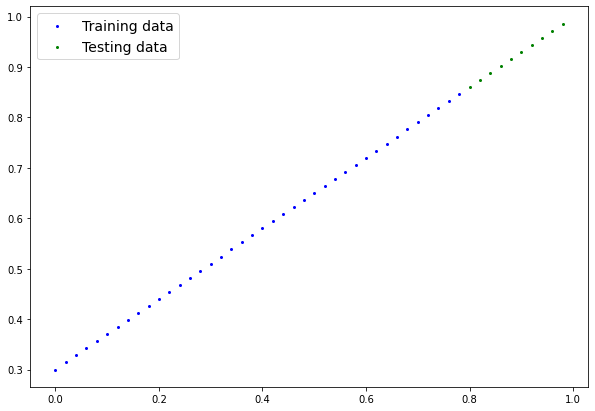

In [6]:
plot_prediction()

### 044-Creating Our First PyTorch Model for Linear Regression

In [34]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, 
                                           dtype=torch.float), 
                                           requires_grad=True)
                                           
    self.bias = nn.Parameter(torch.randn(1,
                                        dtype=torch.float),
                                        requires_grad=True)
                                        
    
    # Forward method to define the computationin the model

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias # linear regression formula



### 047-Checking Out the Internals of Our PyTorch Model

In [35]:
# Creat a random seed
torch.manual_seed(42)

# Creat an instance of the model
model_0 = LinearRegressionModel()

# Check out paramaters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [36]:
# List name of parameters
print(model_0.state_dict())
print(f"ideal value of W={weight} and the ideal val of bias is {bias}. ")


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
ideal value of W=0.7 and the ideal val of bias is 0.3. 


### 048-Making Predictions With Our Random Model Using Inference Mode

In [37]:
# Make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

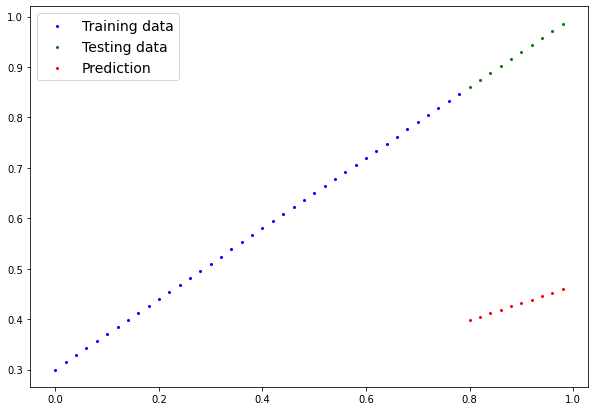

In [38]:
plot_prediction(predictions=y_preds)